<a href="https://colab.research.google.com/github/reouno/deep-learning-with-pytorch-training/blob/main/Ch02_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 02 notebook

In [ ]:
# 事前準備
# Googleドライブのフォルダをマウントする
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 共有ドライブには直接アクセスできないため、マイドライブ内にショートカットを作っておくこと
# （と思ったけどできるみたい。要するにフォルダにアクセスできればどこでも良い。）
# 参考: https://qiita.com/tbshiki/items/ed77f6f9f9ae3761b36d
# 以降、「sandbox > data」へのショートカットがマイドライブに作ってある想定
# 各自の環境に合わせて変更すること
data_dir = '/content/drive/MyDrive/data'

In [ ]:
import torch
from torchvision import models

In [ ]:
# 属性一覧
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [ ]:
# AlexNetアーキテクチャを実行できるオブジェクト
# 重みは未定義もしくはランダムのため出力はゴミ（訓練前）
alexnet_ini = models.AlexNet()

In [ ]:
# 事前学習済みモデルは、関数（小文字で始まる）から利用可能
resnet = models.resnet101(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:00<00:00, 402MB/s]


In [ ]:
# ResNetのアーキテクチャ
# https://deepage.net/deep_learning/2016/11/30/resnet.html
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
# ImageNetで訓練された画像分類モデルに入力するための基本的な前処理機能
from torchvision import transforms
preprocess = transforms.Compose([
    transforms.Resize(256),  # 入力画像を256x256に変換（拡大もしくは縮小）
    transforms.CenterCrop(224),  # 中心部224x224をクロップ
    transforms.ToTensor(),  # Pytorchテンソル（ここではDxHxWの3次元配列）
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    ),  # ImageNetデータの平均と標準偏差に合わせる
])

### 画像データの読み込みと前処理実行

(1024, 934)
<class 'PIL.JpegImagePlugin.JpegImageFile'>


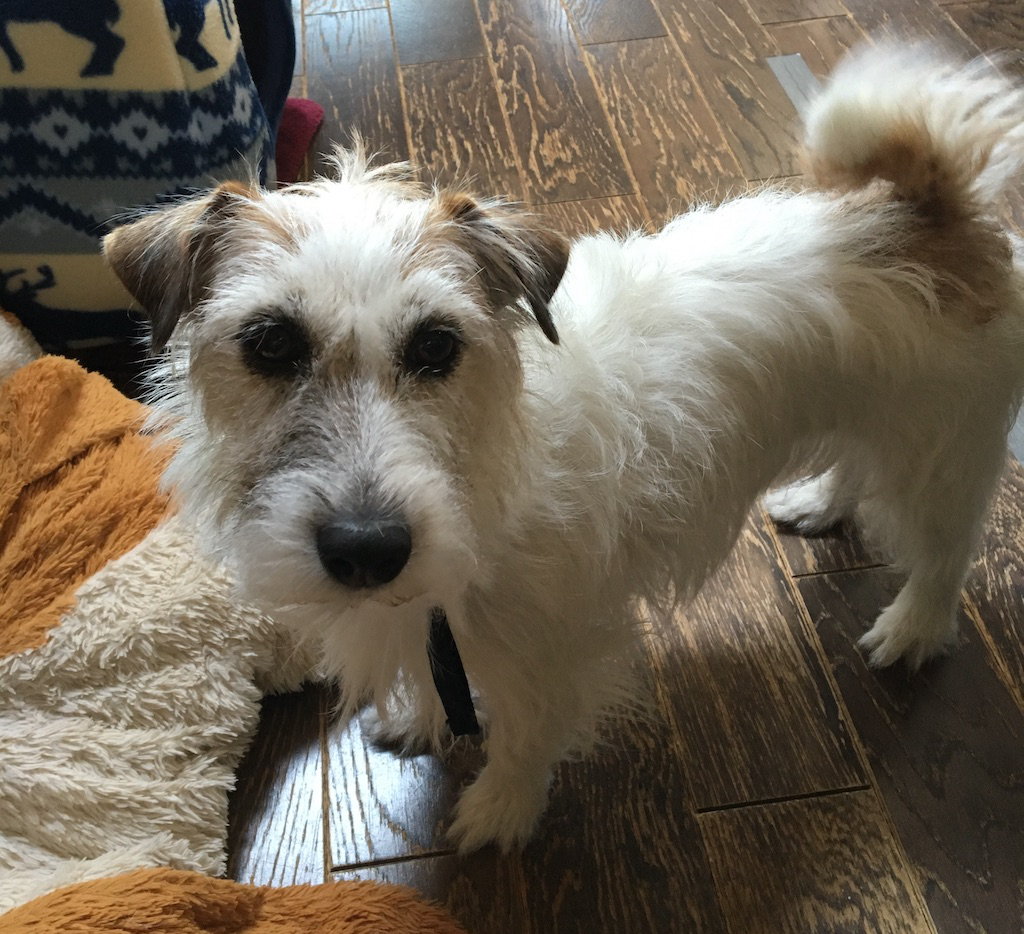

In [ ]:
from PIL import Image
img = Image.open(f'{data_dir}/misica.jpeg')

# 画像サイズ
print(img.size)

# 画像のデータ型
print(type(img))

# 画像をプレビュー
img.show()

In [ ]:
# 前処理を実行
img_t = preprocess(img)

print('img_tのサイズ:', img_t.shape)  # 224x224に変換されている
print(type(img_t))  # torch.Tensorに変換されている

# 先頭に次元を追加
# （入力データは バッチサイズxDxHxW の4次元が想定されているので）
batch_t = torch.unsqueeze(img_t, 0)
print('batch_tのサイズ:', batch_t.shape)

img_tのサイズ: torch.Size([3, 224, 224])
<class 'torch.Tensor'>
batch_tのサイズ: torch.Size([1, 3, 224, 224])


### 推論（順伝播）を実行

In [ ]:
# evalモードにする
# バッチ正規化やドロップアウトを含むモデルの場合この設定を忘れると出力がゴミになる（著しく精度が下がる）可能性
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
# 推論
# ImageNetは1000クラス分類なので、1000要素の配列が出力される
out = resnet(batch_t)
out

tensor([[-3.8976e+00, -2.6309e+00, -3.0161e+00, -4.4180e+00, -5.7060e-01,
         -5.0624e+00, -3.3251e+00, -3.4476e-01, -3.4619e-01, -1.7193e+00,
         -2.0912e+00, -1.2458e+00, -2.7074e+00, -2.1569e+00, -3.5139e+00,
         -2.2974e+00, -2.7894e-01, -5.8133e-01, -1.6564e+00, -2.3598e-02,
         -2.2619e+00, -4.2942e+00, -4.0365e+00, -1.2208e+00, -2.2032e+00,
         -2.0441e+00, -2.6713e+00, -2.9384e+00, -3.0681e+00, -1.9780e+00,
         -4.0386e+00, -2.5857e+00, -3.4785e+00, -2.5391e+00, -2.4404e+00,
         -2.6799e+00, -1.8739e+00, -1.6041e+00, -3.0989e+00, -2.4809e+00,
         -2.8789e+00, -2.0852e+00, -3.1522e+00, -3.4508e+00, -2.5189e+00,
         -2.1360e+00, -2.5941e+00, -3.9947e+00, -2.4894e+00, -2.1838e+00,
         -1.8291e+00, -2.8202e+00, -1.1081e+00, -1.3734e+00, -1.3371e+00,
         -1.6950e+00, -3.0596e-01, -2.3052e+00, -2.1541e+00, -2.4056e+00,
         -7.5109e-01, -2.0442e+00, -1.5513e+00, -2.7541e+00, -2.8562e+00,
         -4.0005e+00, -2.1423e+00, -2.

In [ ]:
# ImageNetのラベル一覧を取得
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

# ダウンロードしたラベル一覧を読み込む
with open('imagenet_classes.txt') as fp:
  labels = [line.strip() for line in fp.readlines()]

--2023-05-24 08:58:30--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2023-05-24 08:58:30 (113 MB/s) - ‘imagenet_classes.txt’ saved [10472/10472]



In [ ]:
# 1000クラスのうち、最大スコアを獲得したクラスのインデックスを取得
_value, index = torch.max(out, 1)
print(f'生の出力値:{_value}, インデックス:{index}')

生の出力値:tensor([11.3235], grad_fn=<MaxBackward0>), インデックス:tensor([184])


In [ ]:
# Softmax関数を適用して確信度を得る
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
print(f'ラベル:{labels[index[0]]}, 確信度:{percentage[index[0]].item()}')

# ※ ミーシカはジャックラッセルテリアだが、ImageNetデータにはそのラベルは無い。

ラベル:Irish terrier, 確信度:43.26130294799805


In [ ]:
# 上位5番までのラベルを取得
_values, indices = torch.sort(out, descending=True)  # 降順でソートし、元の配列におけるインデックスの一覧を返す

for n in range(5):
  idx = indices[0][n]
  print(f'ラベル:{labels[idx]},\t確信度:{percentage[idx].item()}')

ラベル:Irish terrier,	確信度:43.26130294799805
ラベル:miniature schnauzer,	確信度:13.22939395904541
ラベル:wire-haired fox terrier,	確信度:7.459433555603027
ラベル:Sealyham terrier,	確信度:6.337861061096191
ラベル:Norfolk terrier,	確信度:5.43312931060791
